In [1]:
import sys
sys.path.append('..\install\lib')

import numpy as np
import reader
from matplotlib import pyplot
import mnpy as mn
import sklearn as skl
import sklearn.pipeline as sklpipilne
import sklearn.model_selection as sklms


In [2]:
def plot_gallery(images, titles, h, w, n_row=1, n_col=2):
    pyplot.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pyplot.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pyplot.subplot(n_row, n_col, i + 1)
        pyplot.imshow(images[i].reshape((h, w)), cmap=pyplot.cm.gray)
        pyplot.title(titles[i], size=12)
        pyplot.xticks(())
        pyplot.yticks(())


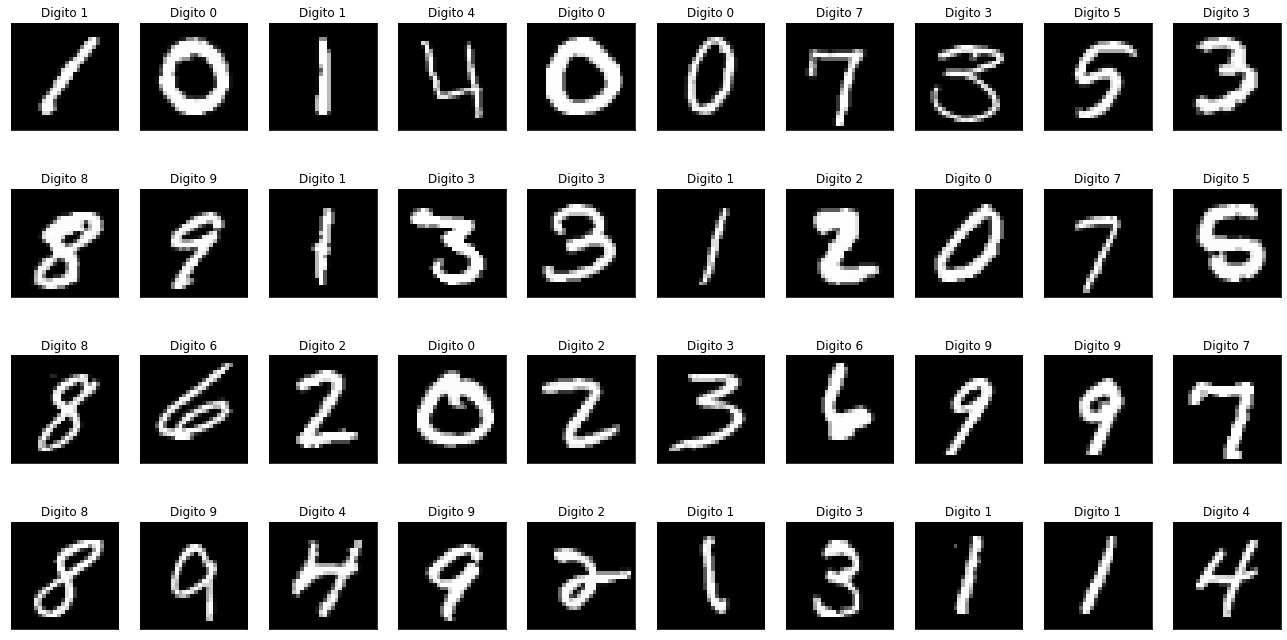

In [3]:
df = reader.read7Zip('../data/train.7z')
targets = df['label'].to_numpy()
# la primer columna es el label, el resto son los 28*28 pixeles de cada imagen
images = df.iloc[:, 1:].to_numpy()

cols = 10
rows = 4
samples = rows*cols
titles = ["Digito %d" % digit for digit in targets[0:samples] ]
plot_gallery(images[0:samples], titles, 28, 28, rows, cols)
pyplot.show()

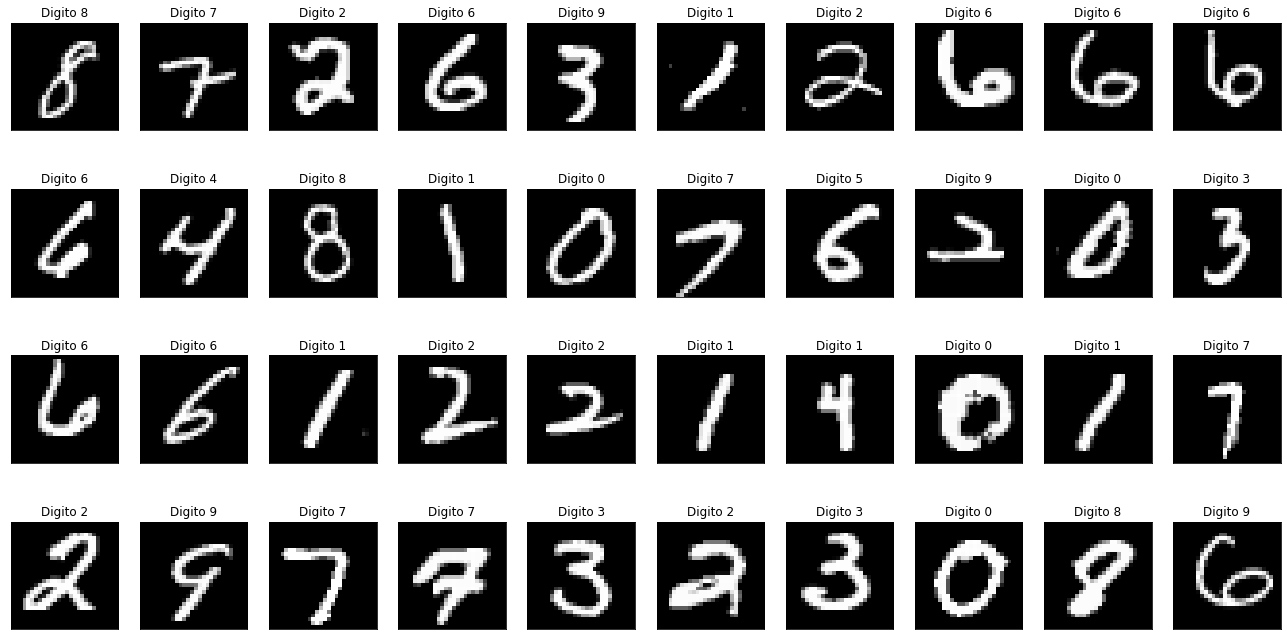

In [4]:
pca = mn.PCA(16, 120)
training_dataset = images[0:4000]
training_targets = targets[0:4000]

pca.fit(training_dataset)

knn = mn.kNNClassifier(3)
knn.fit(pca.transform(training_dataset), training_targets)

predict_dataset = images[5000:5040]
predicted_tagets = knn.predict(pca.transform(predict_dataset))

titles = ["Digito %d" % digit for digit in predicted_tagets[0:samples] ]
plot_gallery(predict_dataset, titles, 28, 28, rows, cols)
pyplot.show()


In [5]:
estimators = [("pca", mn.PCA()), ("knn", mn.kNNClassifier())]
pipeline = sklpipilne.Pipeline(estimators)

param_grid = [
    {
        'pca__n_components': [2, 4, 8, 12, 16, 20, 24, 28],
        'pca__iterated_power': [24, 32, 48, 64, 72, 96, 128 ],
        'knn__k_neighbors': [1, 2, 3, 4, 5, 6, 7, 8],
    },
]

kfold = sklms.KFold(n_splits=10, shuffle=True)

grid_search = sklms.GridSearchCV(estimator=pipeline, cv=kfold, param_grid=param_grid)
grid_search.fit(X=images, y=targets)
results = grid_search.cv_results_['mean_test_score']
legends = grid_search.cv_results_['params']

best_params = grid_search.best_params_
best_k_neighbors = best_params['knn__k_neighbors']
best_n_components = best_params['pca__n_components']


TypeError: cannot pickle 'mnpy.PCA' object